In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

Libraries

In [4]:
import matplotlib.pyplot  as plt
%matplotlib inline
import librosa  # normalize the audio file and give same sample_rate  mono_type or  streo_type
import librosa.display
import numpy as np

# Preprocessing and feature extraction

In [5]:
from scipy.io import wavfile as wav
filename = "/content/drive/MyDrive/wavfiles/101308-0.wav"
wave_sample_rate, wave_audio = wav.read(filename)

In [ ]:
wave_audio

array([-0.1333897 , -0.03653242,  0.06493116, ..., -0.03692225,
       -0.11714743, -0.1425361 ], dtype=float32)

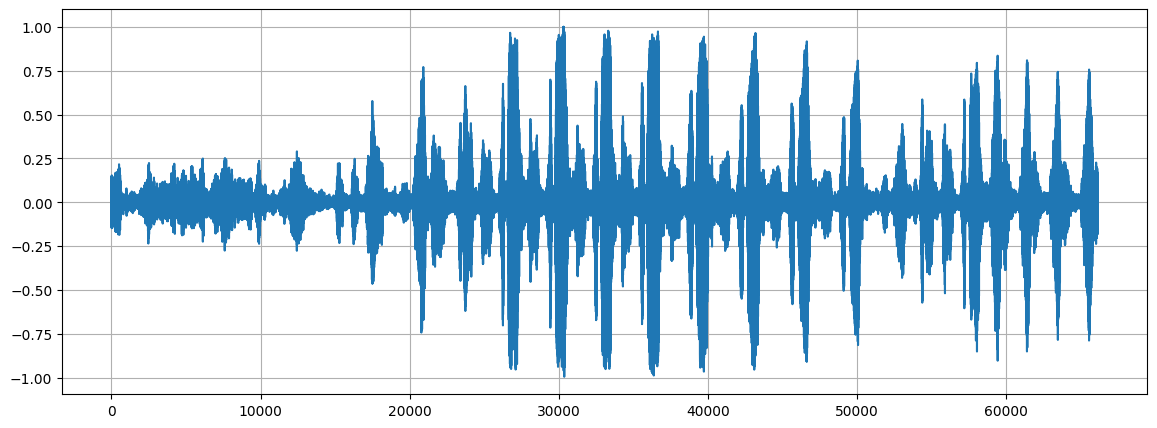

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(wave_audio)
plt.grid()

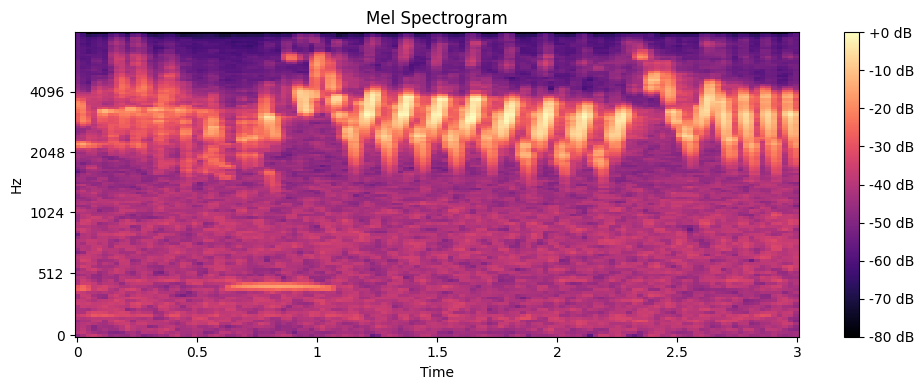

In [6]:
#mel spectrogram
def extract_mel_spectrogram(file_path, n_mels=128):
    y, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

#Visualize a mel spectrogram
filename = "/content/drive/MyDrive/wavfiles/101308-0.wav"
mel_spec = extract_mel_spectrogram(filename)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, x_axis='time', y_axis='mel', sr=22050, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [7]:
import os
import pandas as pd

audio_dataset_path = "/content/drive/MyDrive/wavfiles"
metadata = pd.read_csv("/content/drive/MyDrive/bird_songs_metadata.csv")

In [ ]:
metadata

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


In [ ]:
metadata.shape

(5422, 18)

In [ ]:
metadata['species'].value_counts()

,count
species,
melodia,1256
polyglottos,1182
cardinalis,1074
migratorius,1017
bewickii,893


# Features and labels

In [9]:

def extract_features_and_labels(metadata, audio_dataset_path):
    features = []
    labels = []

    for index, row in metadata.iterrows():
        wav_file = row['filename']
        wav_path = os.path.join(audio_dataset_path, wav_file)

        if os.path.exists(wav_path):
            mel_spec = extract_mel_spectrogram(wav_path)
            features.append(mel_spec)
            labels.append(row['species'])

    return np.array(features), np.array(labels)

X, y = extract_features_and_labels(metadata, audio_dataset_path)

KeyboardInterrupt: 

Features into csv saved file

In [8]:
import pandas as pd

# Flattening the features to create a 2D array
X_flattened = X.reshape(X.shape[0], -1)  # Shape: (4976, 128 * 130)

# Create a DataFrame from features and labels
df = pd.DataFrame(X_flattened)
df['label'] = y

# Save the DataFrame to a CSV file
csv_file_path = "/content/drive/MyDrive/features_and_labels.csv"
df.to_csv(csv_file_path, index=False)

print(f"Features and labels saved to {csv_file_path}")


NameError: name 'X' is not defined

In [ ]:
X.shape, y.shape


((636, 128, 130), (636,))

In [ ]:
X

array([[[-73.99643 , -76.468895, -69.038734, ..., -68.544785,
         -68.26912 , -72.50034 ],
        [-67.74435 , -64.18081 , -63.603035, ..., -66.52162 ,
         -63.53174 , -64.28187 ],
        [-66.12213 , -59.288246, -59.54519 , ..., -68.19919 ,
         -61.57509 , -63.12964 ],
        ...,
        [-65.081825, -62.94539 , -63.798218, ..., -65.29363 ,
         -65.00829 , -68.48562 ],
        [-72.48113 , -68.611115, -68.69414 , ..., -67.90217 ,
         -69.07231 , -71.03651 ],
        [-80.      , -80.      , -78.77305 , ..., -77.81036 ,
         -80.      , -80.      ]],

       [[-62.922577, -64.56258 , -67.5549  , ..., -71.81589 ,
         -68.81407 , -70.24488 ],
        [-61.52989 , -63.66037 , -66.84962 , ..., -67.85747 ,
         -69.901855, -73.84248 ],
        [-64.181496, -64.89094 , -64.64268 , ..., -65.87129 ,
         -66.6642  , -69.89536 ],
        ...,
        [-47.61531 , -46.58259 , -47.742798, ..., -65.28601 ,
         -66.603584, -68.61833 ],
        [-49

Features and labels into array format

In [10]:
import pandas as pd
import numpy as np

# Load the CSV file
csv_file_path = "/content/drive/MyDrive/features_and_labels.csv"
df = pd.read_csv(csv_file_path)

# Separate the labels (y) and features (X)
y = df['label'].values  # Extract the label column
X_flattened = df.drop('label', axis=1).values  # Drop the label column and get features

# Reshape the flattened features back to original shape
num_samples = X_flattened.shape[0]
X = X_flattened.reshape(num_samples, 128, 130)  # Assuming original shape is known

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (636, 128, 130), y shape: (636,)


# Data augmentation (add noise to existing data)

In [ ]:
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_level * noise
    return augmented_audio


# Preprocessing Labels

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)


In [ ]:
len(y_encoded)


4976

In [ ]:
y_one_hot.shape

(4976, 5)

# Train-test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)


In [ ]:
X_train.shape

(3483, 128, 130)

# Model Architecture

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, Input
from tensorflow.keras.models import Model

# Input Layer
input_layer = Input(shape=(128, 130, 1))


x = Conv2D(64, (3, 3), padding='same', activation='swish')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), padding='same', activation='swish')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


residual = Conv2D(256, (1, 1), padding='same')(x)  # Residual Connection
x = Conv2D(256, (3, 3), padding='same', activation='swish')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding='same', activation='swish')(x)
x = BatchNormalization()(x)
x = Add()([x, residual])  # Add residual connection
x = MaxPooling2D((2, 2))(x)


x = Conv2D(512, (3, 3), padding='same', activation='swish')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = GlobalAveragePooling2D()(x)


x = Dense(256, activation='swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


output_layer = Dense(5, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 130, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 130, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 130, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 65, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 65, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 65, 128)    │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 256)    │         33,024 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 256)    │              0 │ batch_normalization_3… │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 2,311,429 (8.82 MB)

 Trainable params: 2,308,485 (8.81 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [14]:
# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# from tensorflow.keras.optimizers import RMSprop

# # Compile the model with RMSprop
# model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Compile Model with RMSprop & Learning Rate Scheduling
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(learning_rate=0.0005, rho=0.9, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Model Summary



# Training the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/audio_classification.keras',
                                verbose=1,
                                save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1
)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.5459 - loss: 1.5854
Epoch 1: val_loss improved from inf to 30.00917, saving model to /content/drive/MyDrive/audio_classification.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5495 - loss: 1.5737 - val_accuracy: 0.1414 - val_loss: 30.0092
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6877 - loss: 1.1069
Epoch 2: val_loss improved from 30.00917 to 16.90812, saving model to /content/drive/MyDrive/audio_classification.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6898 - loss: 1.1024 - val_accuracy: 0.1257 - val_loss: 16.9081
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7818 - loss: 0.6564
Epoch 3: val_loss improved from 16.90812 to 4.56163, saving model to /content/drive/MyDrive/audio_classification.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7814 - loss: 0.6612 - val_accuracy: 0.1361 - val_loss: 4.5616
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━

# Testing the model

In [ ]:
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 86.74%


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/saved_models/audio_classification.keras')

# Check the model summary

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9609 - loss: 0.1846
Test Accuracy: 95.98%


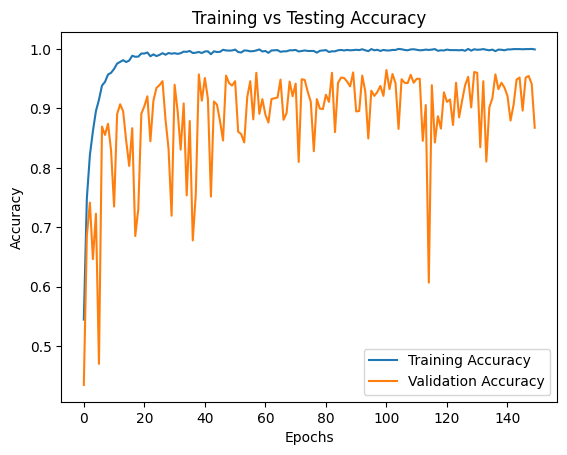

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()


# Prediction

In [ ]:
# Predict on a new file
test_file = "/content/111645-4.wav"

mel_spec = extract_mel_spectrogram(test_file)
mel_spec = mel_spec.reshape(1, mel_spec.shape[0], mel_spec.shape[1], 1)

prediction = model.predict(mel_spec)

predicted_class = np.argmax(prediction)
predicted_label = encoder.inverse_transform([predicted_class])

print(f"Predicted class: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: melodia


In [ ]:
metadata[metadata['filename']=='111645-3.wav']


,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
4201,111645,Melospiza,melodia,fallax,Song Sparrow,Richard E Webster,United States,"San Bernardino National Wildlife Refuge, Cochi...",31.34,-109.273,1100,song,//www.xeno-canto.org/111645,//creativecommons.org/licenses/by-nc-nd/2.5/,09:12,2011-05-11,Individual No 3 on this date,111645-3.wav


# ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

# Define the input shape
input_shape = (128, 130, 1)

# Adjust input shape for pretrained models (3 channels required)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 130, 3))

# Convert 1-channel spectrogram to 3-channel by stacking
def convert_to_rgb(data):
    # Reshape to (N, 128, 130, 1) if needed
    if data.ndim == 3:
        data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)
    # Repeat along the last channel axis
    return np.repeat(data[:, :, :, :], 3, axis=-1)

# Freezing base layers (optional, fine-tune later)
base_model.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Preprocess your dataset to convert it to 3 channels
X_train_rgb = convert_to_rgb(X_train)  # Reshape (N, 128, 130, 1) -> (N, 128, 130, 3)
X_test_rgb = convert_to_rgb(X_test)

# Train the model
history = model.fit(
    X_train_rgb, y_train,
    validation_data=(X_test_rgb, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 130, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 136, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 65, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 65, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 65, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 67, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 33, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 33, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 33, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 33, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 33, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 33, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 33, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 33, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 33, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,209,797 (99.98 MB)

 Trainable params: 2,621,957 (10.00 MB)

 Non-trainable params: 23,587,840 (89.98 MB)

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 203ms/step - accuracy: 0.5976 - loss: 1.1544 - val_accuracy: 0.7803 - val_loss: 0.6028
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8541 - loss: 0.4244 - val_accuracy: 0.8493 - val_loss: 0.4078
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9138 - loss: 0.2799 - val_accuracy: 0.8895 - val_loss: 0.3243
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9600 - loss: 0.1572 - val_accuracy: 0.8875 - val_loss: 0.3234
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9758 - loss: 0.1031 - val_accuracy: 0.8902 - val_loss: 0.3008
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9831 - loss: 0.0730 - val_accuracy: 0.8975 - val_loss: 0.2637
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9788 - loss: 0.0806 - val_accuracy: 0.9149 - val_loss: 0.2620
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9824 - loss: 0.0641 - val

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_rgb, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 89.08%


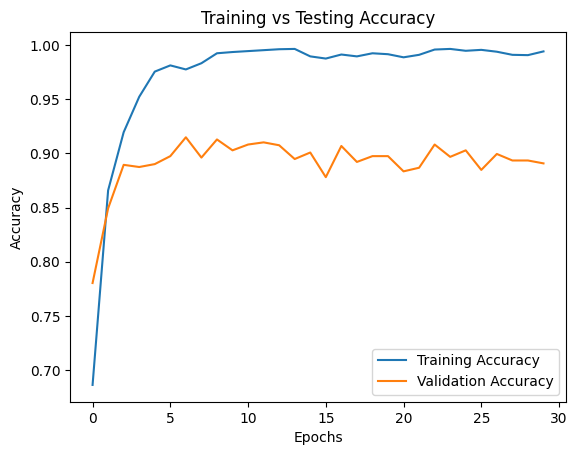

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()
